# Case Study on Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the iris dataset 

In [2]:
data = pd.read_excel(r'F:\iris.xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Basic Detail of the dataset

In [4]:
data.shape

(150, 5)

In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Data PreProcessing

In [7]:
## checking the null values of the dataset

data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

### Handling missing Values

In [8]:
columns_with_missing = ['SL', 'SW', 'PL']

In [9]:
for column in columns_with_missing:
    
    median_value = data[column].median()
    
    # Create a mask for missing values in the column
    mask = data[column].isnull()
    
    data.loc[mask, column] = median_value


In [10]:
# Verifying that missing values are handled

print(data.isnull().sum())

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64


### Checking and Handling Outliers

Text(0.5, 1.0, 'Boxplot for SL')

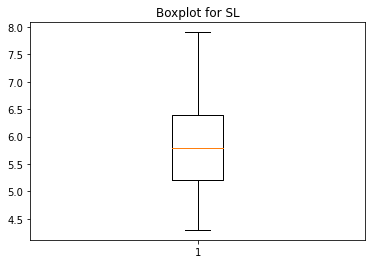

In [11]:
plt.boxplot(data['SL'])
plt.title('Boxplot for SL')

Text(0.5, 1.0, 'Boxplot for SW')

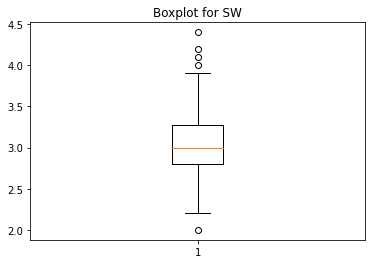

In [12]:
plt.boxplot(data['SW'])
plt.title('Boxplot for SW')

In [13]:
Q1 = np.percentile(data['SW'],25)

In [14]:
Q1

2.8

In [15]:
Q2 = np.percentile(data['SW'],50)

In [16]:
Q2

3.0

In [17]:
Q3= np.percentile(data['SW'],75)

In [18]:
Q3

3.275

In [19]:
IQR=Q3-Q1

In [20]:
IQR

0.4750000000000001

In [21]:
low_limit = Q1 - 1.5*IQR
upr_limit = Q3 + 1.5*IQR

In [22]:
low_limit

2.0874999999999995

In [23]:
upr_limit

3.9875

In [24]:
outlier_for_SW=[]
for x in data['SW']:
    if x>upr_limit or x<low_limit:
        outlier_for_SW.append(x)

In [25]:
outlier_for_SW

[4.0, 4.4, 4.1, 4.2, 2.0]

In [26]:
ind = data['SW']<low_limit
ind1 = data['SW']>upr_limit
data.loc[ind].index

Int64Index([60], dtype='int64')

In [27]:
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [28]:
data.drop([60,14,15,32,33] ,inplace = True)

In [29]:
data.shape

(145, 5)

Text(0.5, 1.0, 'Boxplot for PL')

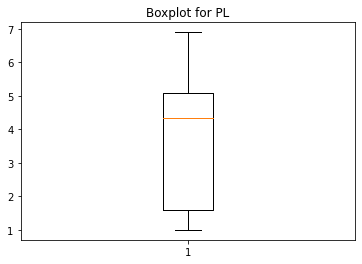

In [30]:
plt.boxplot(data['PL'])
plt.title('Boxplot for PL')

Text(0.5, 1.0, 'Boxplot for PW')

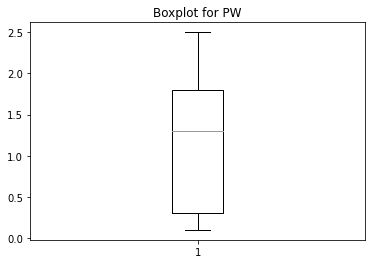

In [31]:
plt.boxplot(data['PW'])
plt.title('Boxplot for PW')

### Encoding

In [32]:
## To count the values of categorical features

data['Classification'].value_counts(normalize = True)

Iris-virginica     0.344828
Iris-versicolor    0.337931
Iris-setosa        0.317241
Name: Classification, dtype: float64

In [33]:
### Label encoding for categorical feature
### importing LabelEncoder from scikit learn library

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [34]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


##  Classification Models

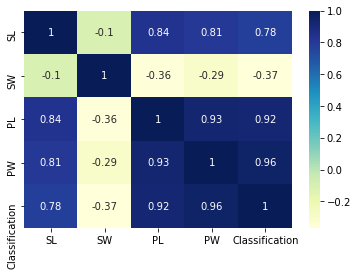

In [35]:
## Correlation of the dataset

corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot = True,cmap = 'YlGnBu')
plt.show()

In [36]:
x = data.drop('Classification',axis=1) ##independent variable
y = data['Classification'] ##target variable

In [37]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [38]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 145, dtype: int32

In [39]:
##splitting training and testing data
## importing train_test_split from model_selection file of scikit learn library.

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'multinomial',solver ='lbfgs',max_iter = 1000)
model = lr.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [41]:
y_pred

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 1, 0])

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test,y_pred)

array([[14,  1,  0],
       [ 0, 10,  1],
       [ 0,  3, 15]], dtype=int64)

In [43]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred,average = None))
print('Recall = ',recall_score(y_test,y_pred,average = None))
print('F1 score = ',f1_score(y_test,y_pred,average = None))

Accuracy =  0.8863636363636364
Precision =  [1.         0.71428571 0.9375    ]
Recall =  [0.93333333 0.90909091 0.83333333]
F1 score =  [0.96551724 0.8        0.88235294]


### KNN Regression

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
metric_k = []
neighbors = np.arange(3,15)

In [46]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors =k,metric ='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [47]:
metric_k

[0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.9090909090909091,
 0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.8863636363636364,
 0.9318181818181818,
 0.9090909090909091]

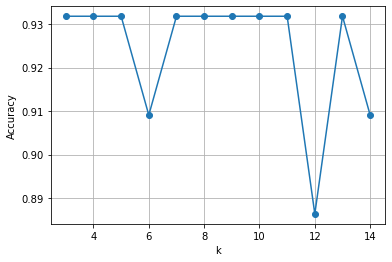

In [48]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [49]:
classifier = KNeighborsClassifier(n_neighbors =5,metric ='euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)

In [50]:
print('Accuracy = ',accuracy_score(y_test,y_predictions))
print('Precision = ',precision_score(y_test,y_predictions,average = None))
print('Recall = ',recall_score(y_test,y_predictions,average = None))
print('F1 score = ',f1_score(y_test,y_predictions,average = None))
confusion_matrix(y_test,y_predictions)

Accuracy =  0.9318181818181818
Precision =  [1.         0.83333333 0.94444444]
Recall =  [0.93333333 0.90909091 0.94444444]
F1 score =  [0.96551724 0.86956522 0.94444444]


array([[14,  1,  0],
       [ 0, 10,  1],
       [ 0,  1, 17]], dtype=int64)

### SVM

In [51]:
from sklearn.svm import SVC
svmc1f = SVC(kernel = 'linear')
svmc1f.fit(x_train,y_train)

SVC(kernel='linear')

In [52]:
y_pred1 = svmc1f.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is',accuracy_score(y_test,y_pred1))

Accuracy is 0.9090909090909091


In [54]:
print(confusion_matrix(y_test,y_pred1))

[[15  0  0]
 [ 0 10  1]
 [ 0  3 15]]


### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred2 = dt_clf.predict(x_test)

In [57]:
print('Accuracy is',accuracy_score(y_test,y_pred2))

Accuracy is 0.9090909090909091


In [58]:
print(confusion_matrix(y_test,y_pred2))

[[15  0  0]
 [ 0 11  0]
 [ 0  4 14]]


### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
y_pred3 = rf_clf.predict(x_test)

In [61]:
print('Accuracy is',accuracy_score(y_test,y_pred3))

Accuracy is 0.9090909090909091


In [62]:
print(confusion_matrix(y_test,y_pred3))

[[15  0  0]
 [ 0 10  1]
 [ 0  3 15]]


In [67]:
#Hyper parameter tuning

rf_clf1=RandomForestClassifier(n_estimators =20,max_depth =20,criterion ='entropy',min_samples_split =3)
rf_clf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [68]:
y_pred4 = rf_clf1.predict(x_test)

In [69]:
print('Accuracy is',accuracy_score(y_test,y_pred4))

Accuracy is 0.9318181818181818


In [66]:
### KNN regression performed better than Logistic Regression and comparing among all the other models like SVM , Decision Tree and Random Forest , they too performed better than Logistic Regression.